___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a></em></center>

# Logistic Regression with Python in Machine Learning

- Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.
- Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign.
- Logistic regression transforms its output using the logistic sigmoid function to return a probability value.


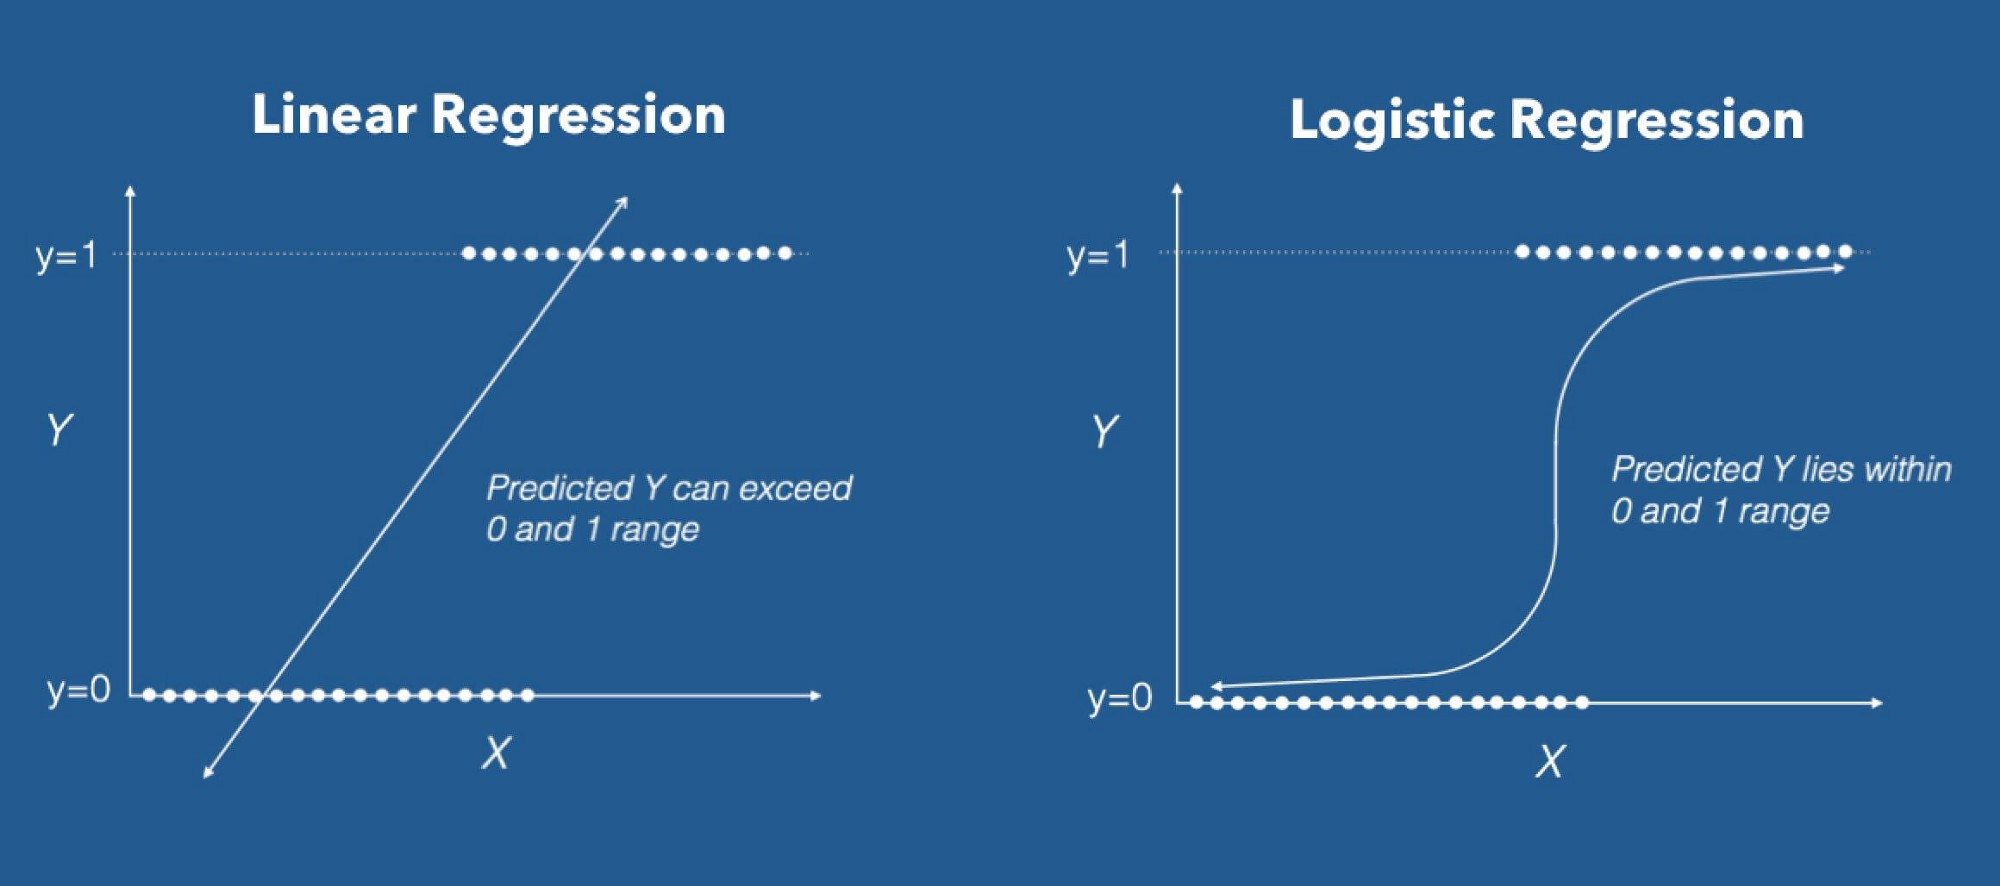

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the `Sigmoid function` or also known as the `logistic function` instead of a linear function

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

#### What is the Sigmoid Function?
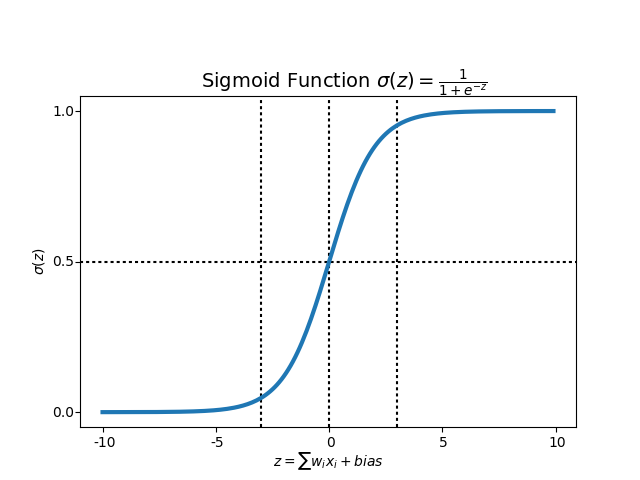

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

#### Decision Boundary
We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

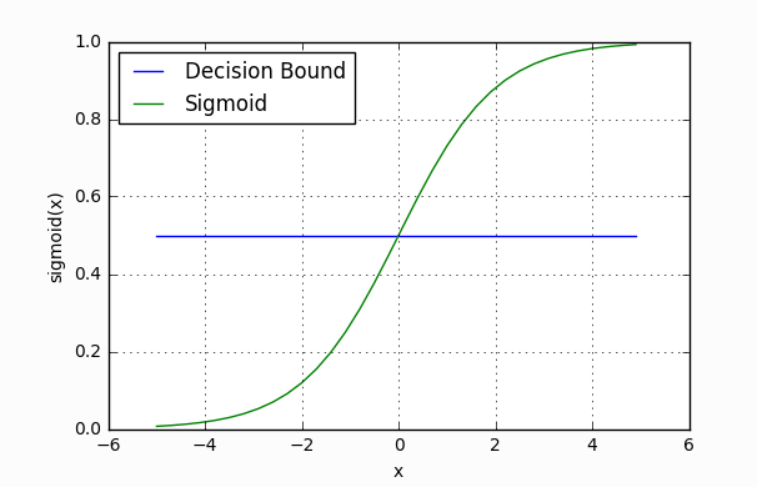

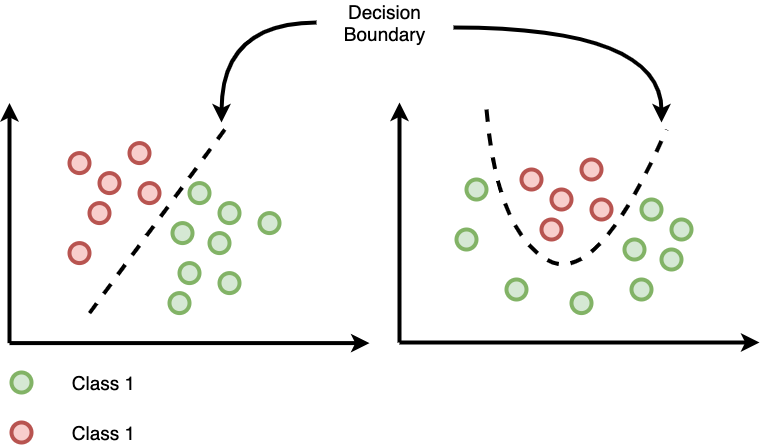

#### Titanic Dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history.
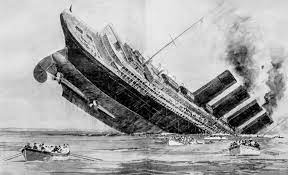

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Full Kaggle Dataset: https://www.kaggle.com/c/titanic

Seaborn Dataset: https://seaborn.pydata.org/generated/seaborn.load_dataset.html

Github Link: https://github.com/mwaskom/seaborn-data

#### Coding

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [288]:
titanic = sns.load_dataset('titanic')

In [289]:
titanic.head()

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [290]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### EDA - Heatmap and Density Plot

In [291]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [292]:
titanic.isnull().sum()['age']/titanic.shape[0]

0.19865319865319866

In [293]:
titanic.isnull().sum()['deck']/titanic.shape[0]

0.7721661054994389

<AxesSubplot:>

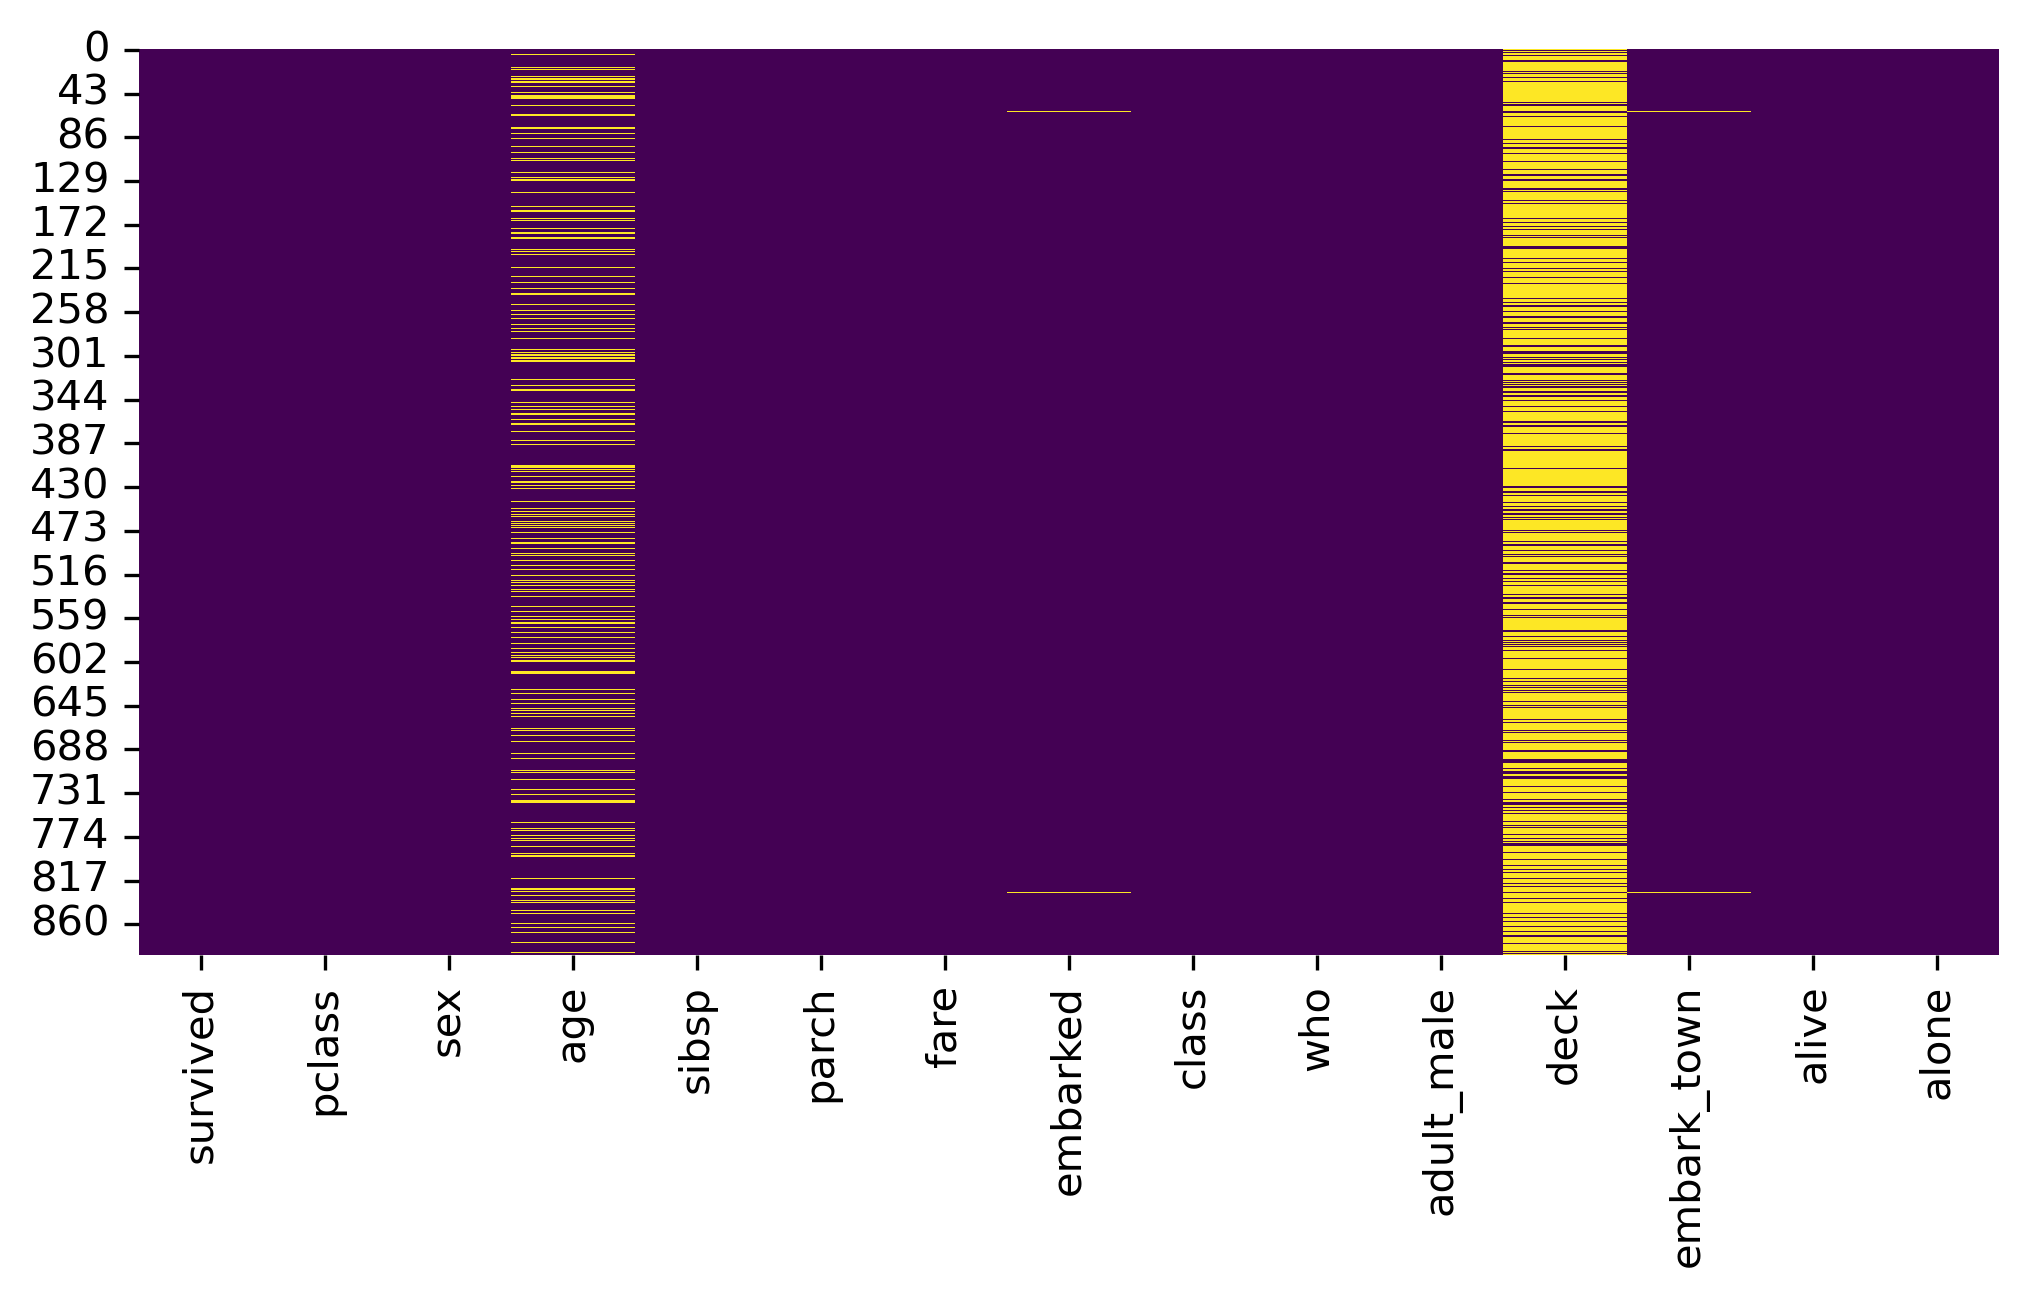

In [294]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 300
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar=False)

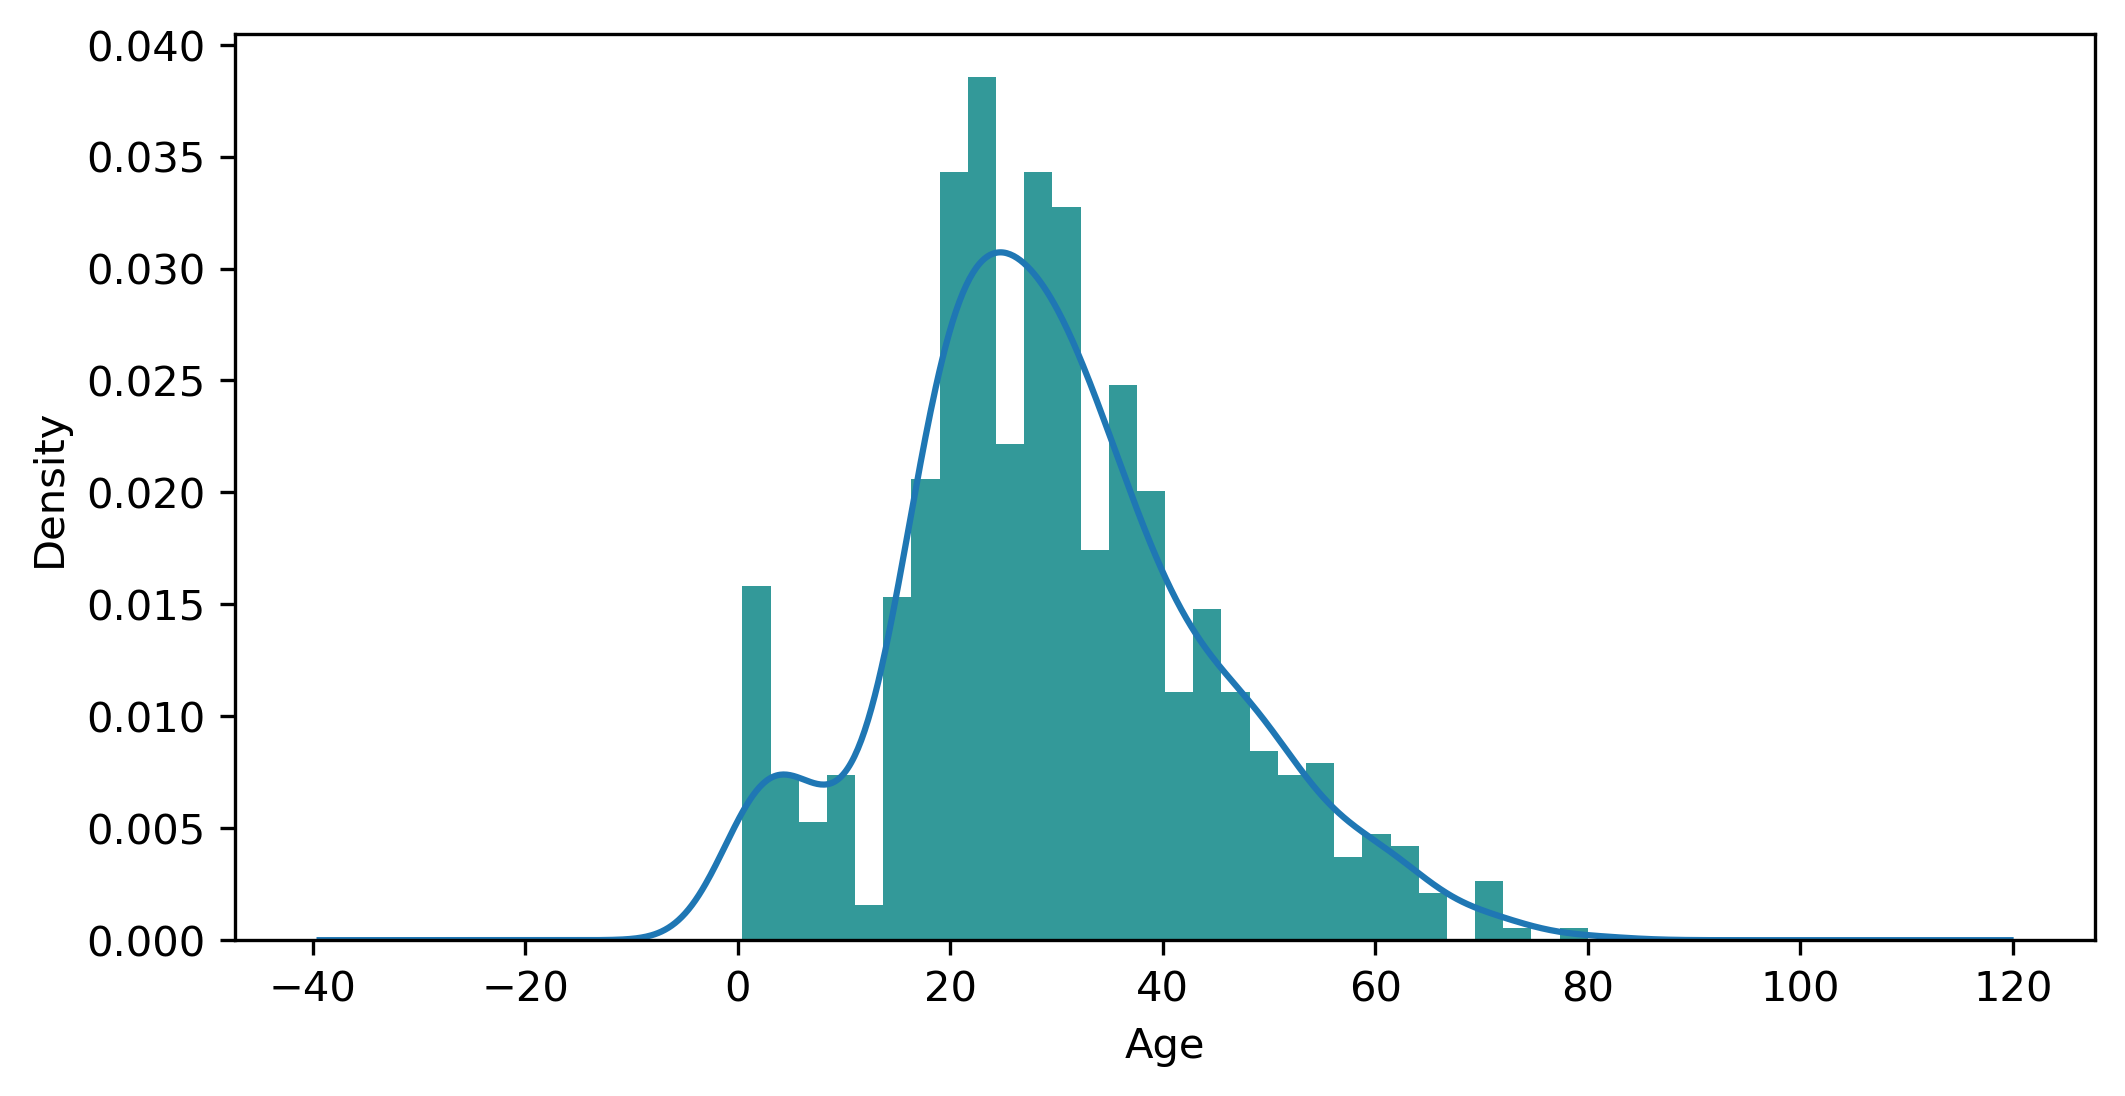

In [295]:
ax = titanic['age'].hist(bins=30, color='teal', grid=False,
                        alpha=0.8, density=True)

titanic['age'].plot(kind='density')
ax.set_xlabel('Age')
plt.show()

#### Missing Age Imputation

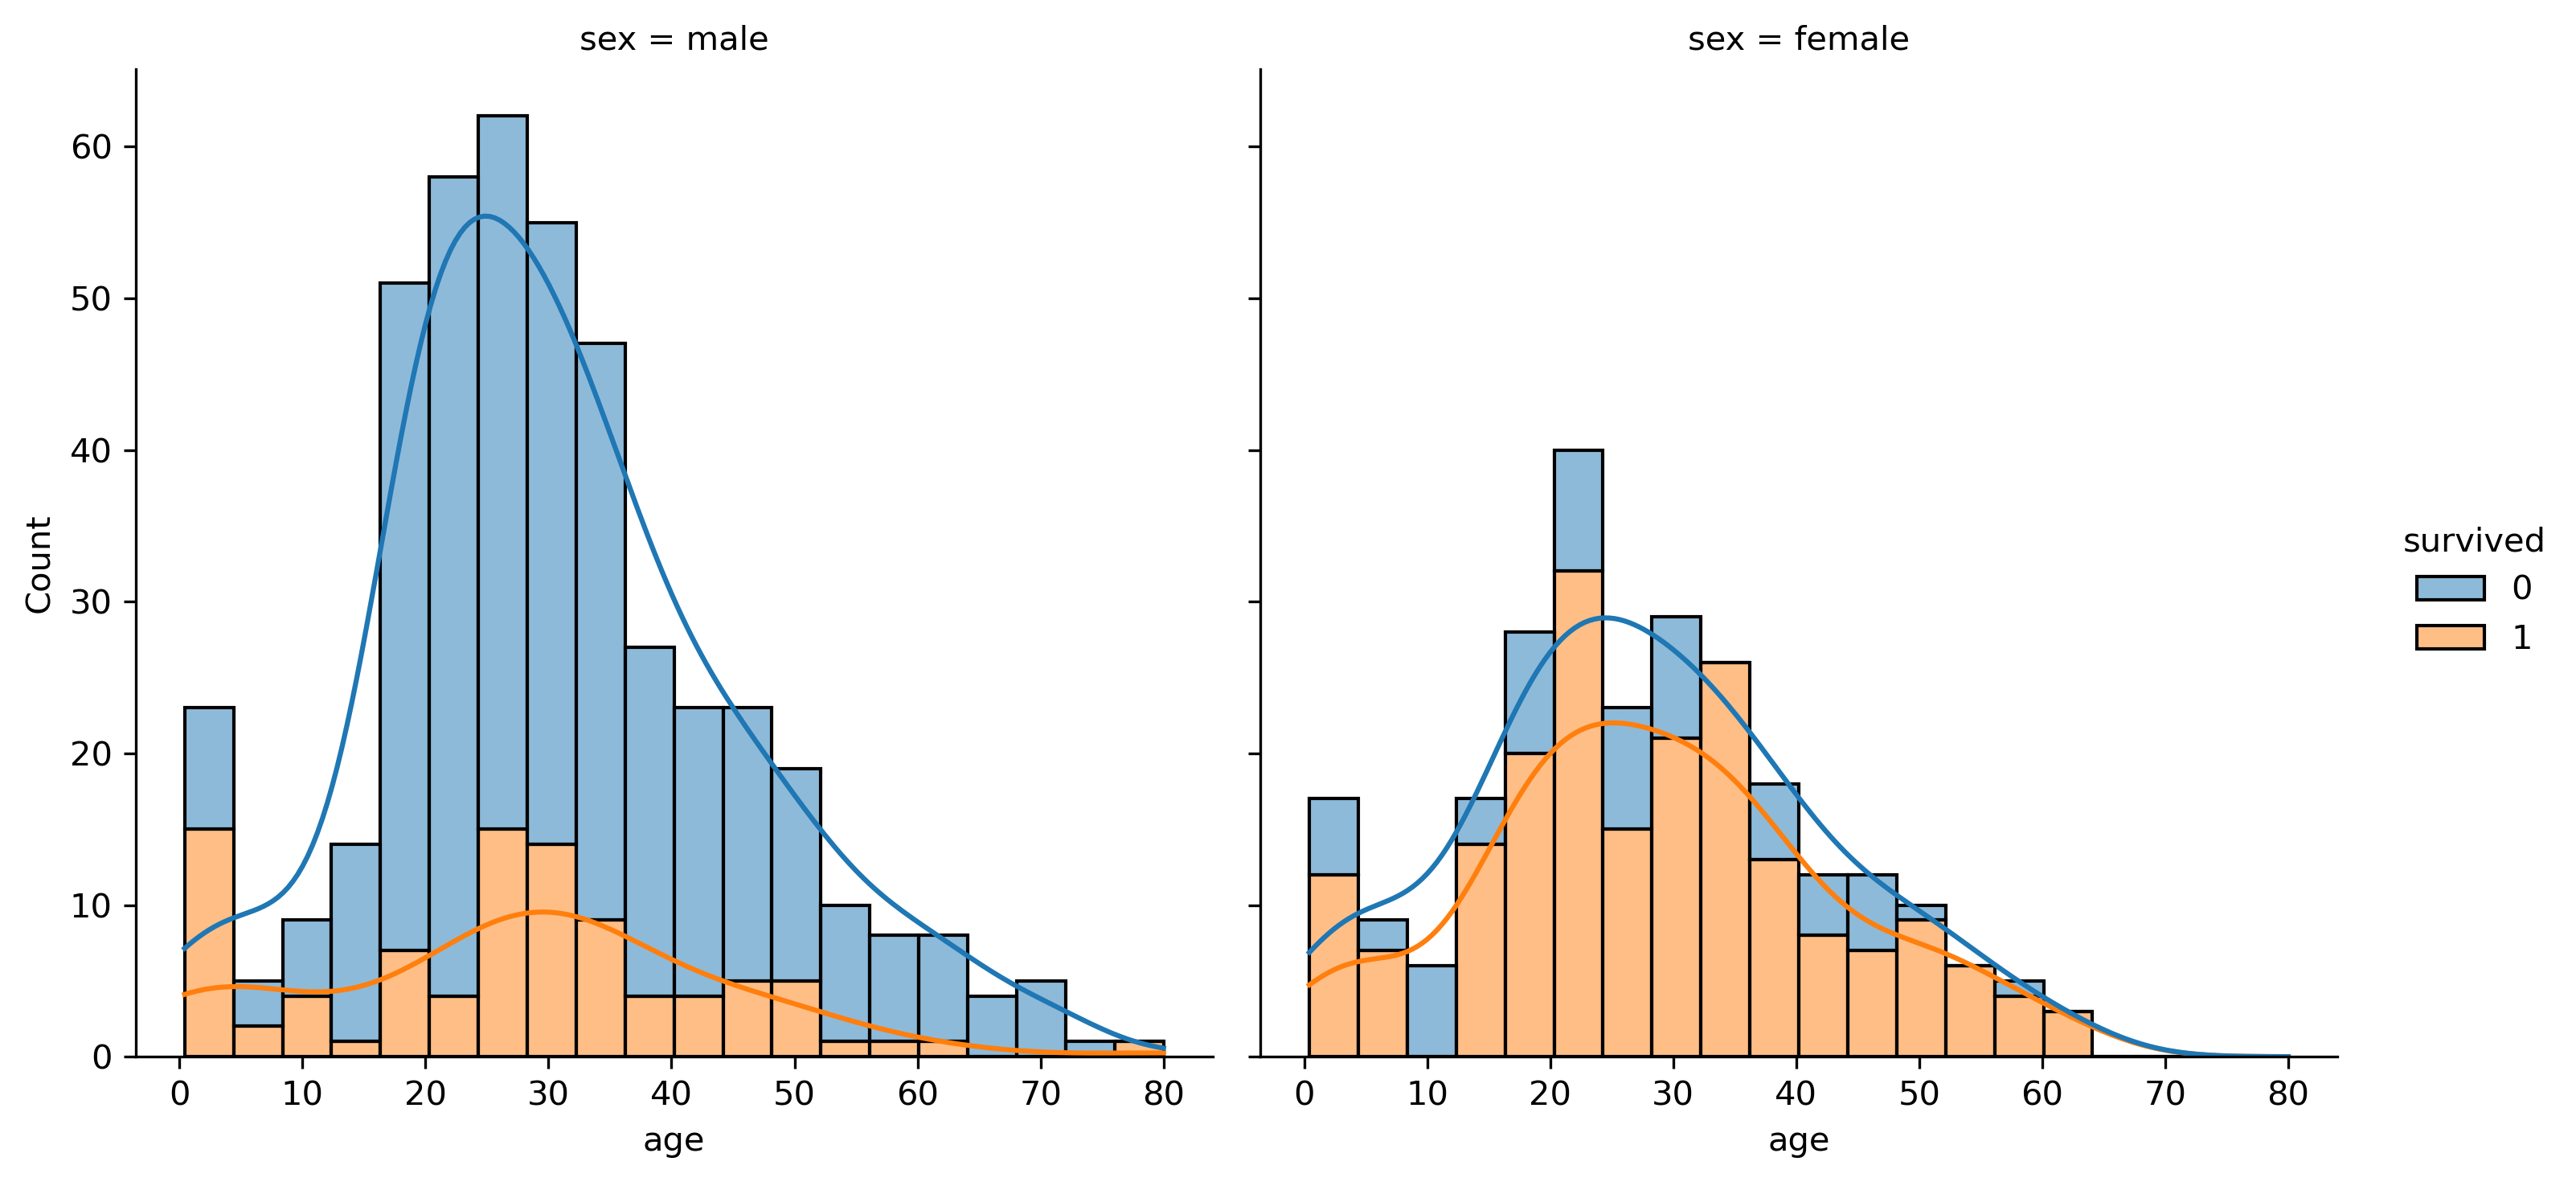

In [296]:
sns.displot(data=titanic, x = 'age', kde=True, bins=20,
           hue='survived', multiple='stack', col='sex')

In [297]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [298]:
titanic[titanic['survived']==1]['sex'].value_counts()

female    233
male      109
Name: sex, dtype: int64

In [299]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

In [300]:
titanic['age'].mean()

29.69911764705882

In [301]:
titanic[titanic['sex']=='male']['age'].mean()

30.72664459161148

In [302]:
titanic[titanic['sex']=='female']['age'].mean()

27.915708812260537

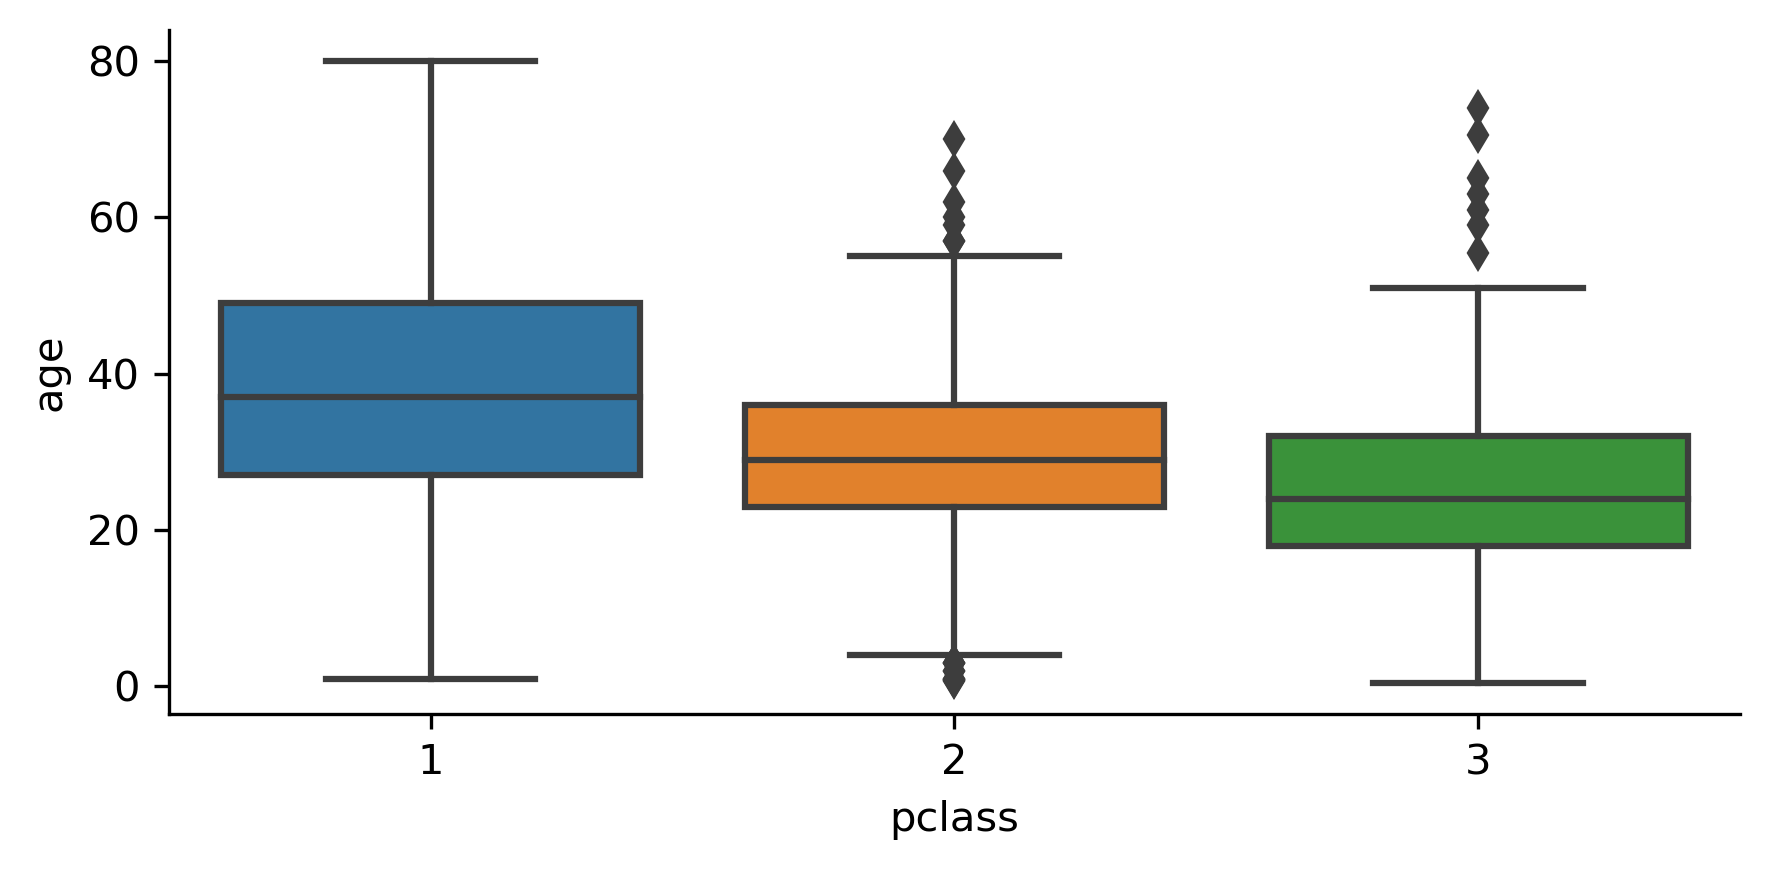

In [303]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box',
           height=3, aspect=2)

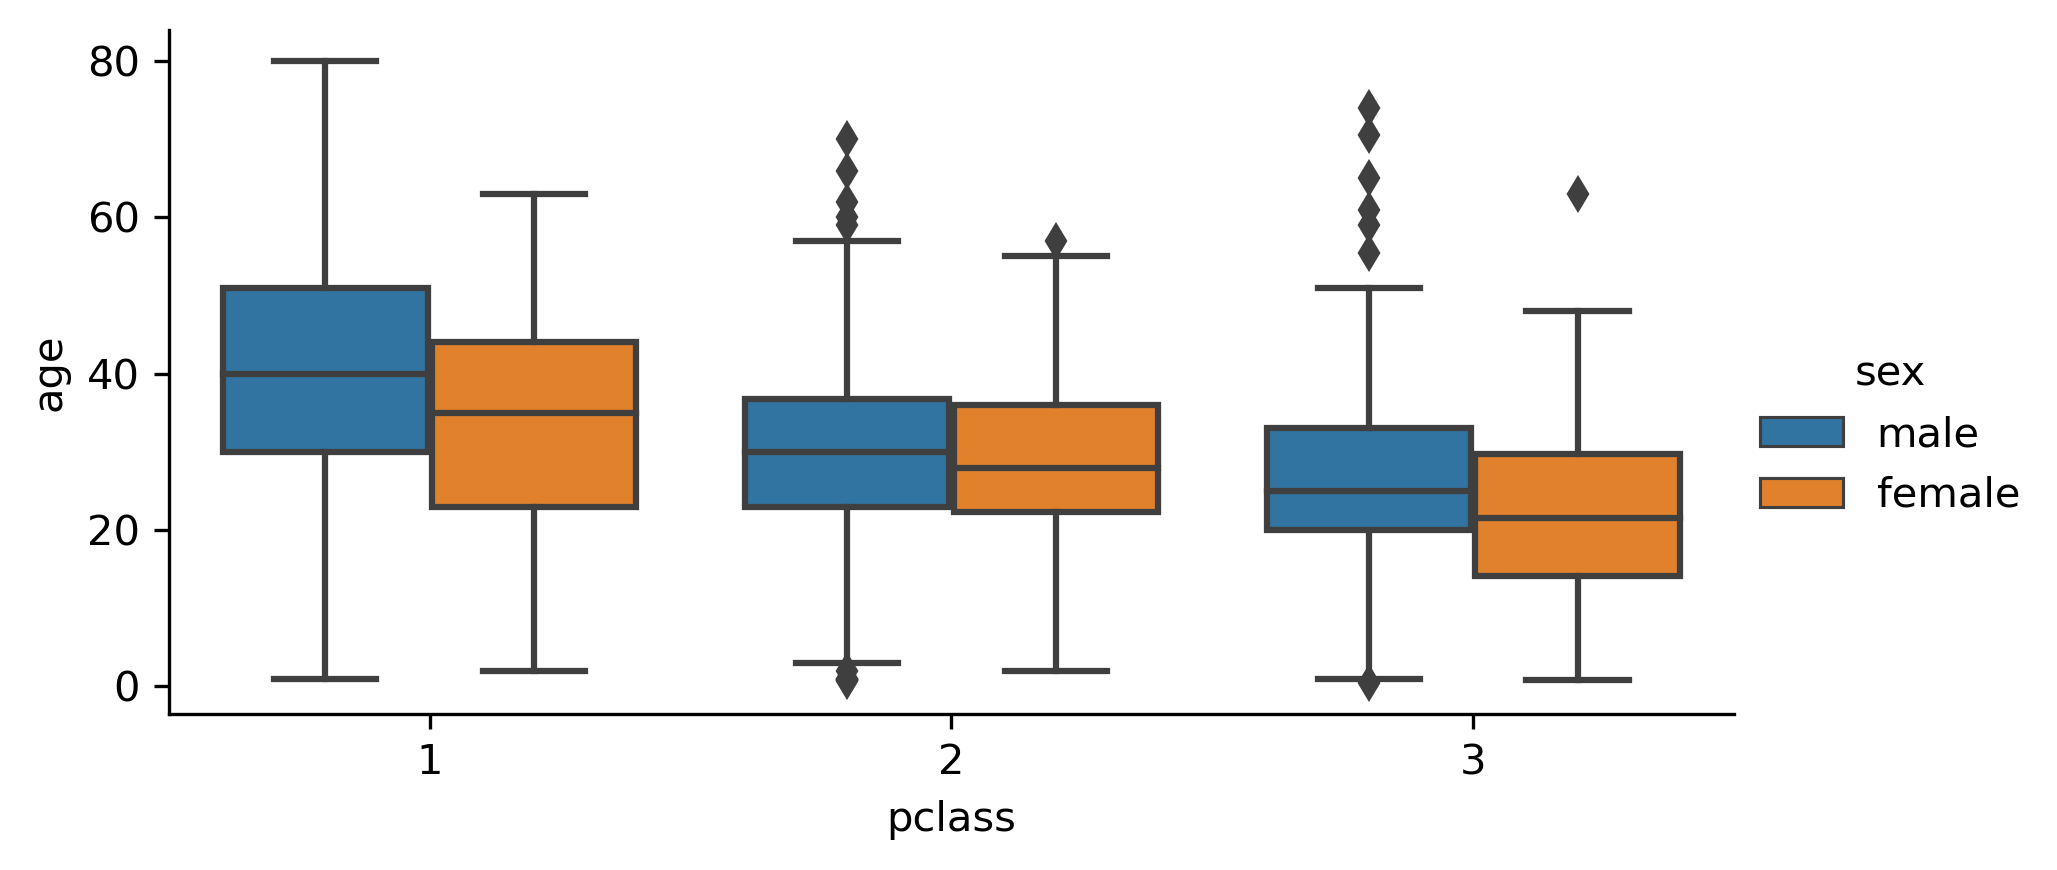

In [304]:
sns.catplot(x='pclass', y='age', data=titanic, kind='box',
           height=3, aspect=2, hue='sex')

In [305]:
def impute_age(pclass, sex):
    if sex=='male':
        if pclass==1:
            return titanic[(titanic['pclass']==1)&(titanic['sex']=='male')]['age'].mean()
        elif pclass==2:
            return titanic[(titanic['pclass']==2)&(titanic['sex']=='male')]['age'].mean()
        elif pclass==3:
            return titanic[(titanic['pclass']==3)&(titanic['sex']=='male')]['age'].mean()
        
    else:
        if pclass==1:
            return titanic[(titanic['pclass']==1)&(titanic['sex']!='male')]['age'].mean()
        elif pclass==2:
            return titanic[(titanic['pclass']==2)&(titanic['sex']!='male')]['age'].mean()
        elif pclass==3:
            return titanic[(titanic['pclass']==3)&(titanic['sex']!='male')]['age'].mean() 

In [306]:
titanic['age'] = titanic.apply(lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis=1)

In [307]:
# titanic

In [308]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Analyzing Embarked Town

In [309]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

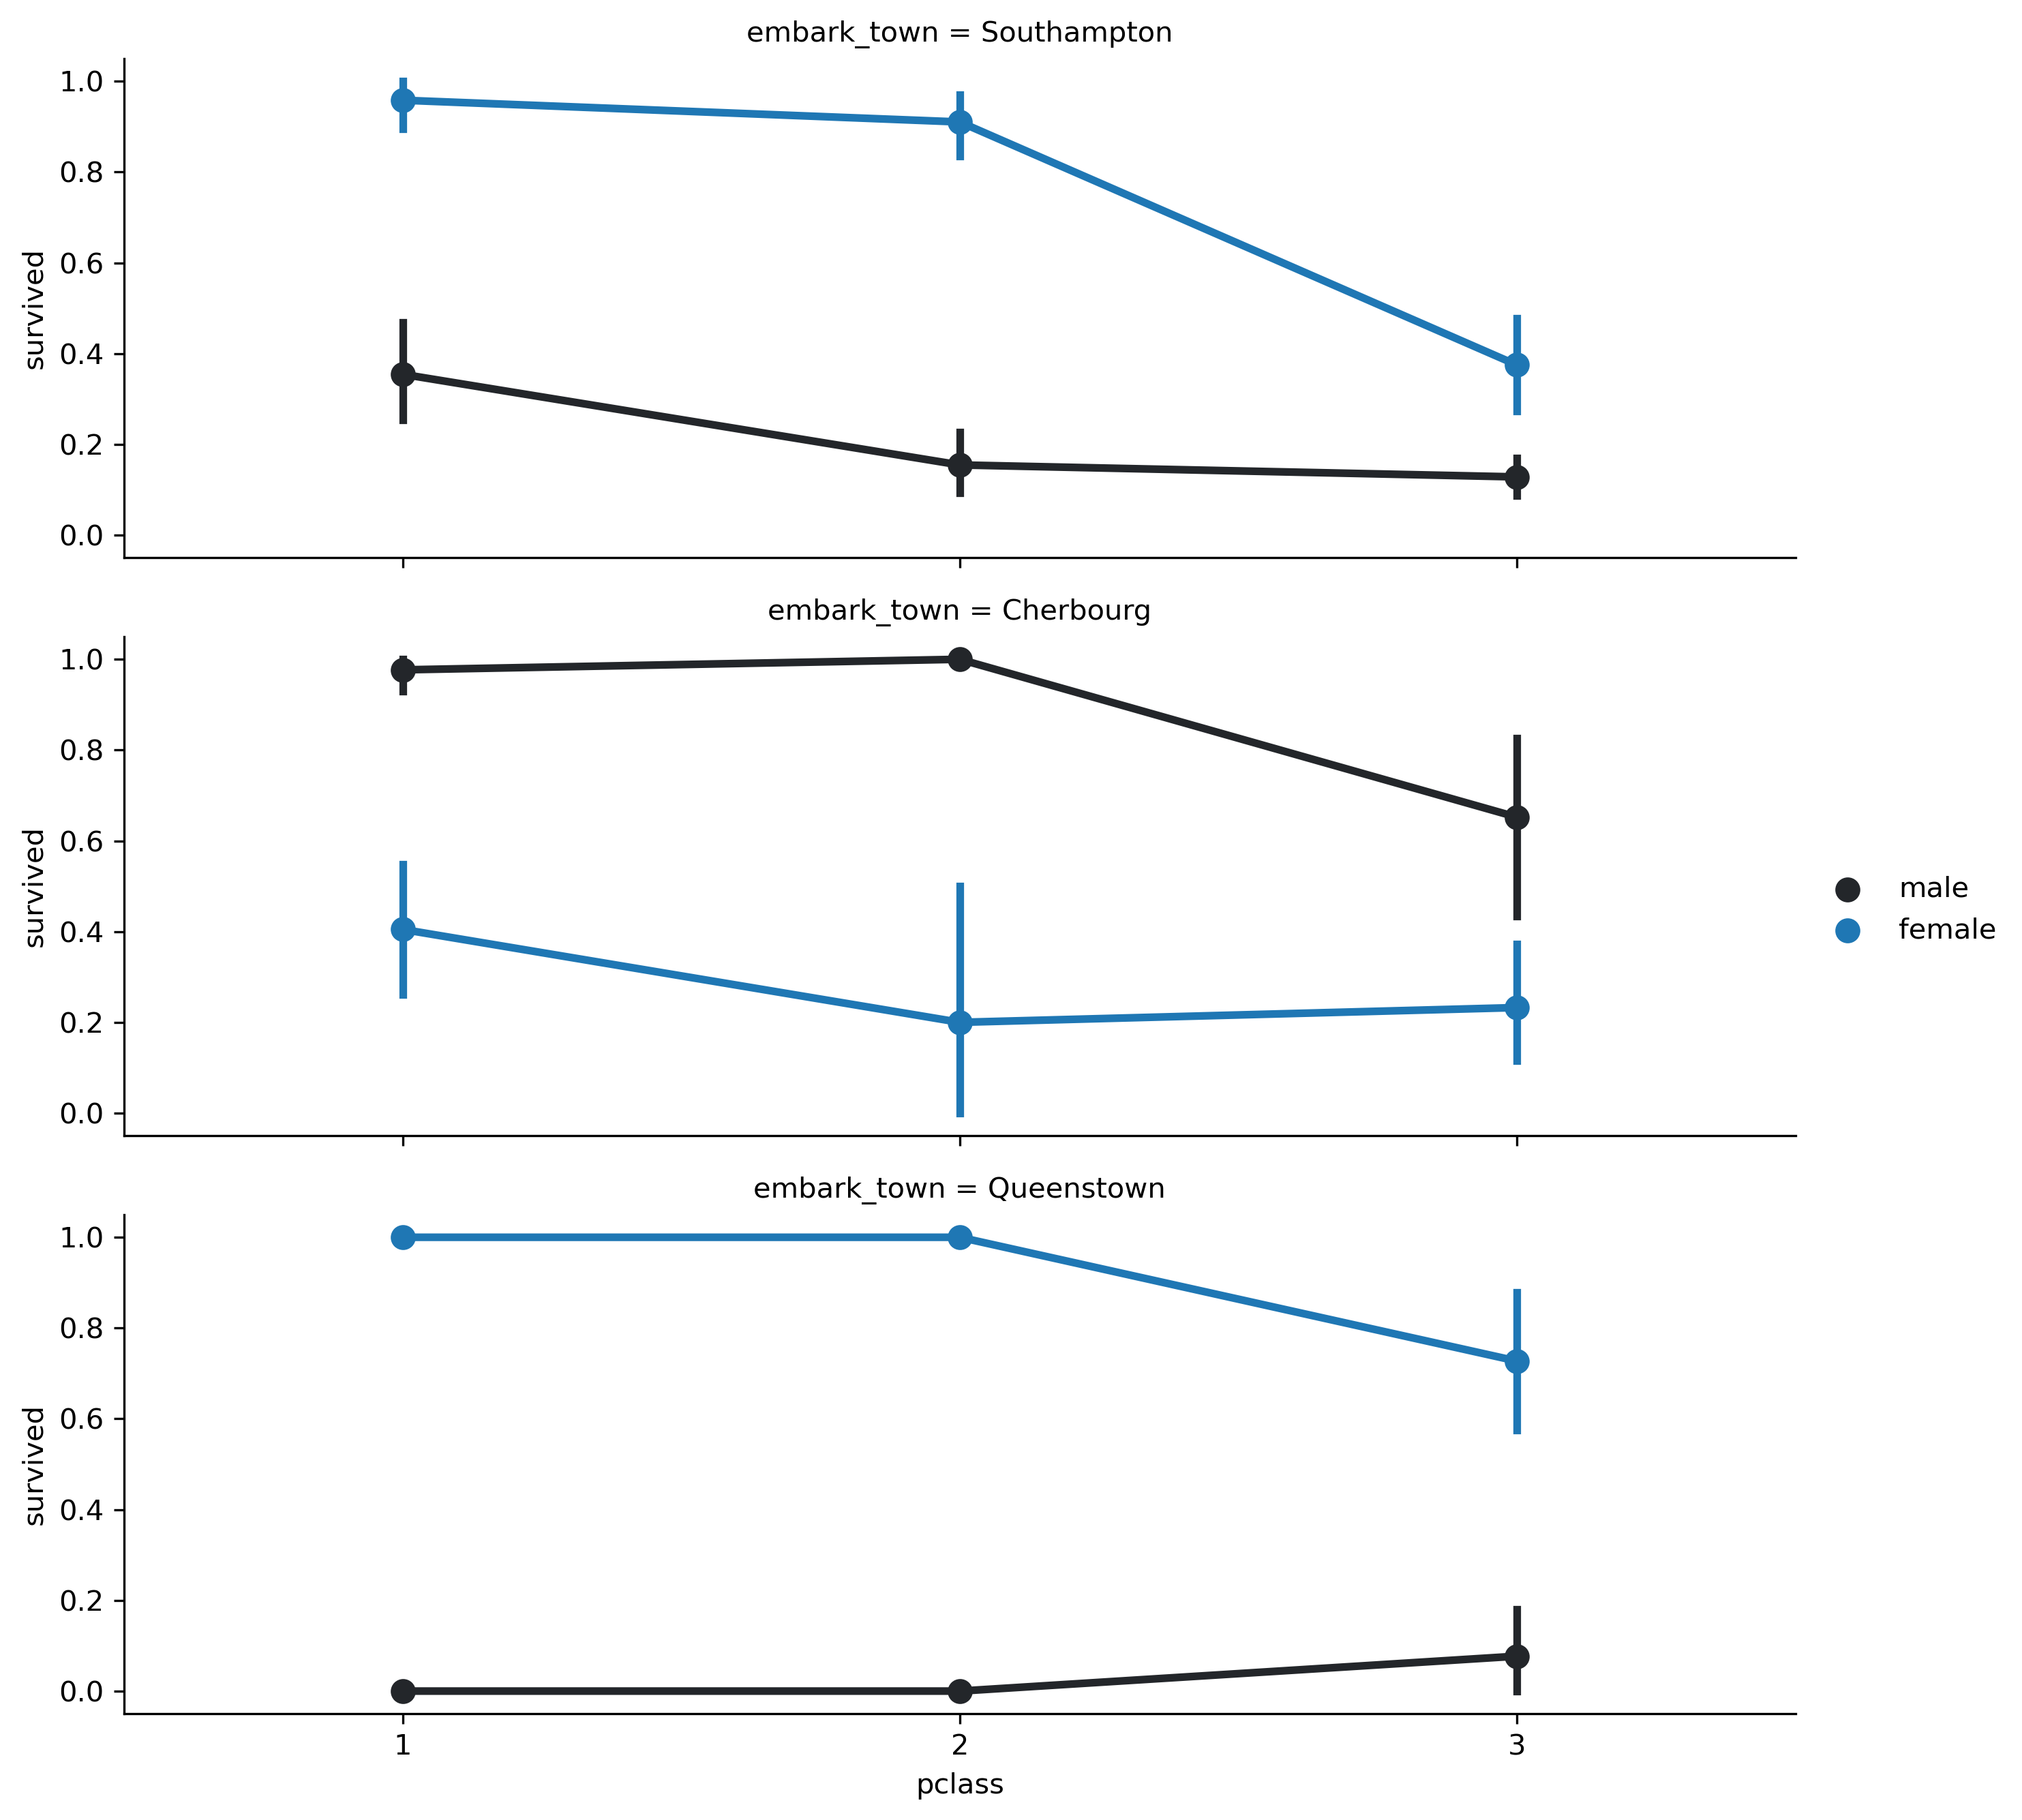

In [310]:
f = sns.FacetGrid(titanic, row='embark_town', height=3, 
                  aspect=3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', 
      order = None, hue_order=None)
f.add_legend()

In [311]:
titanic['embark_town'].isnull().sum()

2

In [312]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [313]:
titanic['embark_town'].fillna('Southampton', inplace=True)

In [314]:
titanic['embark_town'].isnull().sum()

0

In [315]:
titanic['embarked'].isnull().sum()

2

In [316]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [317]:
titanic['embarked'].fillna('S', inplace=True)

In [318]:
titanic['embarked'].isnull().sum()

0

In [319]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [320]:
titanic.drop(['deck', 'embark_town', 'alive'], inplace=True, axis=1)

In [321]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [322]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


#### Data Types Correction and Mapping

In [323]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [324]:
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

In [325]:
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

In [326]:
who = {'man': 0, 'woman': 1, 'child': 2}
# titanic['who'].map(who) ## fix this with one-hot encoding

In [327]:
titanic['adult_male'] = titanic['adult_male'].map({True: 1, False:0})

In [328]:
titanic['alone'] = titanic['alone'].map({True: 1, False:0})

In [329]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

#### One-Hot Encoding

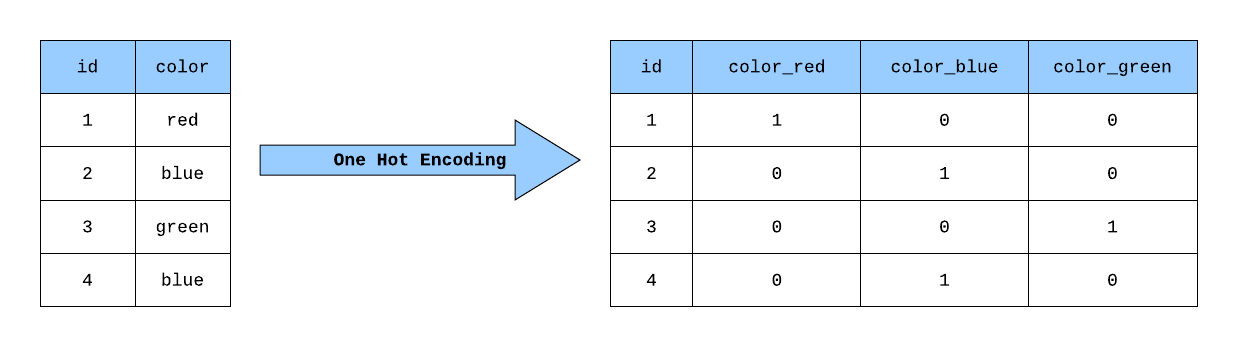

In [330]:
titanic = pd.get_dummies(titanic, columns=['embarked', 'who'])

In [331]:
titanic.drop(['embarked_S', 'who_woman'], axis=1, inplace=True)

In [332]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    int64   
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   class       891 non-null    category
 8   adult_male  891 non-null    int64   
 9   alone       891 non-null    int64   
 10  embarked_C  891 non-null    uint8   
 11  embarked_Q  891 non-null    uint8   
 12  who_child   891 non-null    uint8   
 13  who_man     891 non-null    uint8   
dtypes: category(1), float64(1), int32(2), int64(6), uint8(4)
memory usage: 60.3 KB


In [333]:
titanic = pd.get_dummies(titanic, columns=['pclass']).drop('pclass_3', axis=1)

In [334]:
titanic.drop('class', axis=1, inplace=True)

In [335]:
# titanic.astype('int') # not needed

#### Build Logistic Regression Model

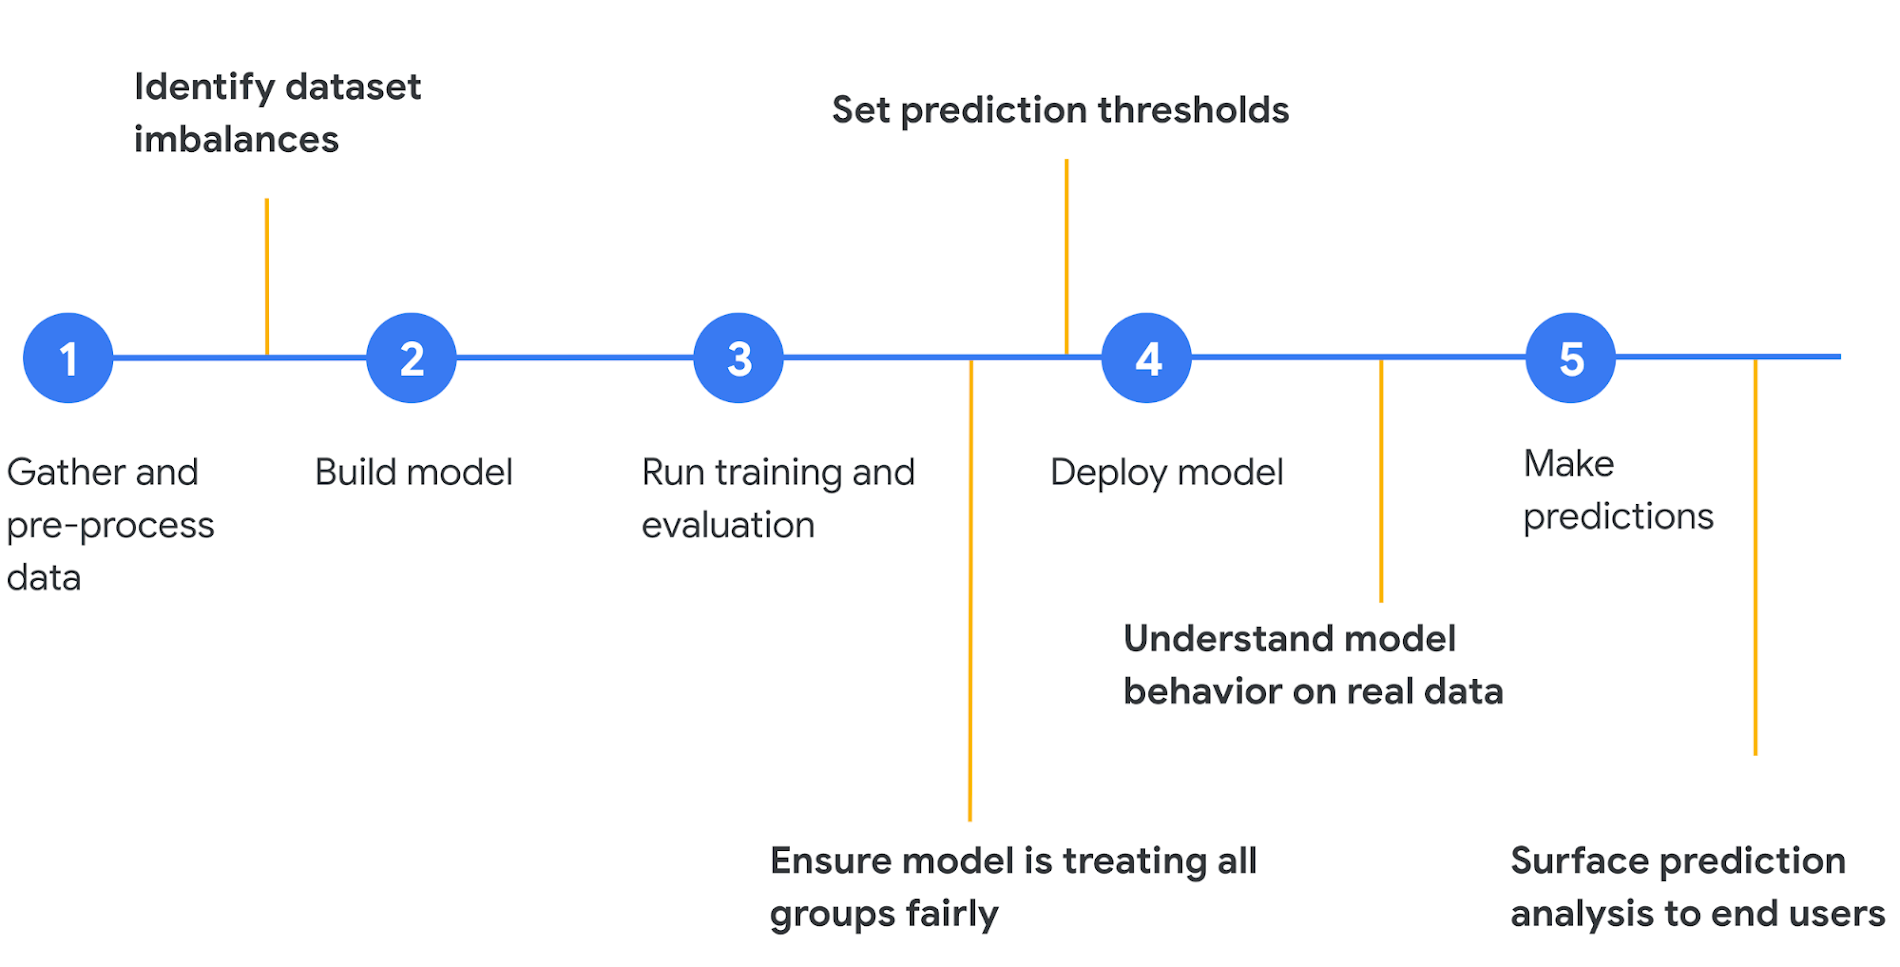

In [336]:
input_cols = list(titanic.columns[1:])
target_col = 'survived'

In [337]:
X = titanic[input_cols]
y = titanic[target_col]

In [338]:
# titanic


In [339]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [340]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [341]:
X.shape, X_train.shape, X_test.shape

((891, 13), (623, 13), (268, 13))

In [342]:
268/891

0.30078563411896747

In [343]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [344]:
model.score(X_test, y_test)

0.8171641791044776

In [345]:
print(input_cols)

['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'embarked_C', 'embarked_Q', 'who_child', 'who_man', 'pclass_1', 'pclass_2']


#### Feature Selection | Recursive Feature Elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a  feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

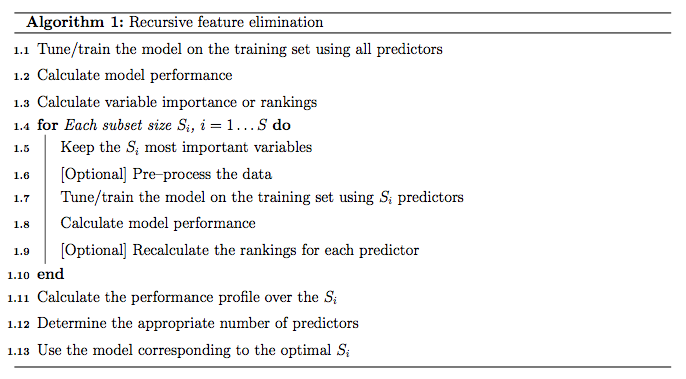

In [346]:
from sklearn.feature_selection import RFE

In [347]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5, verbose=1)
rfe = rfe.fit(X_train, y_train)
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [348]:
rfe.support_

array([False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True])

In [349]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2'], dtype='object')

In [350]:
def find_best_feature(n):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000)
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X_train, y_train)
    selected_col = X_train.columns[rfe.support_]

    model.fit(X_train[selected_col], y_train)
    score = model.score(X_test[selected_col], y_test)
    print("Selected columns: ", list(selected_col))
    print(n, score)
    print("----------------------\n")

In [351]:
for i in range(X.shape[1]-1):
    find_best_feature(i+1)

Selected columns:  ['who_man']
1 0.7947761194029851
----------------------

Selected columns:  ['who_man', 'pclass_1']
2 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'who_man', 'pclass_1']
3 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'who_man', 'pclass_1', 'pclass_2']
4 0.7947761194029851
----------------------

Selected columns:  ['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
5 0.7947761194029851
----------------------

Selected columns:  ['sibsp', 'adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
6 0.8246268656716418
----------------------

Selected columns:  ['sibsp', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
7 0.8097014925373134
----------------------

Selected columns:  ['sibsp', 'parch', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
8 0.8283582089552238
----------------------

Selected columns:  ['sibsp', 'parch', 'adult_male', 'a

In [352]:
((82.83-81.7)/81.7)*100

1.3831089351285135

#### Accuracy, F1-Score, P, R, AUC_ROC curve

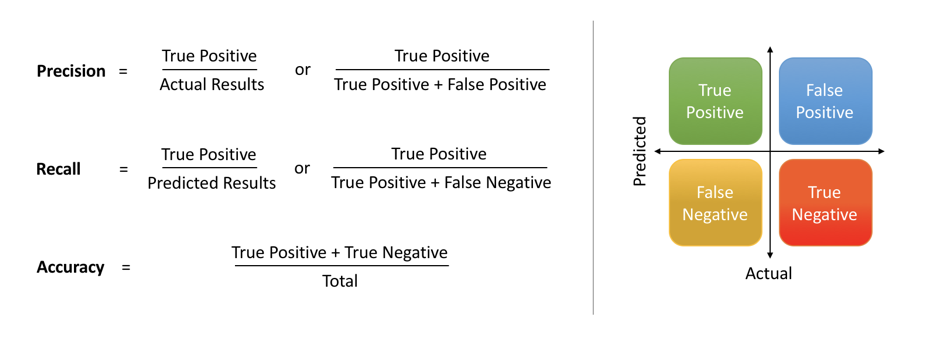

**True Positives (TP):** These are the correctly predicted positive values which means that the value of actual class is true and the value of predicted class is also true.
- If actual class value indicates that this passenger survived and predicted class tells you the same thing.

**True Negatives (TN):** These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.
- If actual class says this passenger did not survive and predicted class tells you the same thing.

**False Positives (FP):**
When actual class is false and predicted class is True.
- If actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

**False Negatives (FN):**
When actual class is true but predicted class in false. 
- If actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

In [353]:
# 90 -> 0
# 10 -> 1

# 100 -> 0 i.e. 90 classes are classified => 90%

# 10 -> 1 => 0 => 0%

In [354]:
best_features = ['sex', 'age', 'sibsp', 'parch', 'adult_male', 'alone', 'embarked_C', 'embarked_Q', 'who_child', 'who_man', 'pclass_1', 'pclass_2']
len(best_features)

12

In [355]:
set(X_train.columns)-set(best_features)

{'fare'}

In [356]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train[best_features], y_train)

y_predict = model.predict(X_test[best_features])

#### Confusion Matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm.

In [357]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [358]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.83      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [359]:
cv = (cross_val_score(model, X_train[best_features], y_train, cv=5))
cv

array([0.792     , 0.904     , 0.776     , 0.79032258, 0.83064516])

In [360]:
cv.mean()

0.8185935483870969

In [361]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

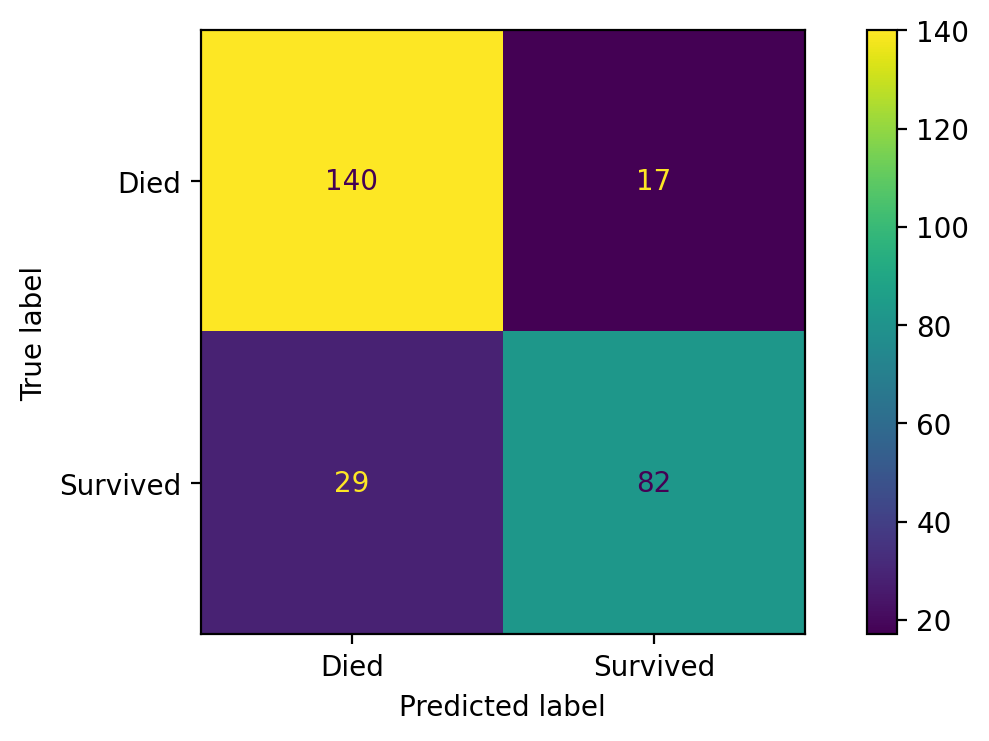

In [362]:
plt.rcParams['figure.dpi'] = 200
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot()

#### ROC Curve and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

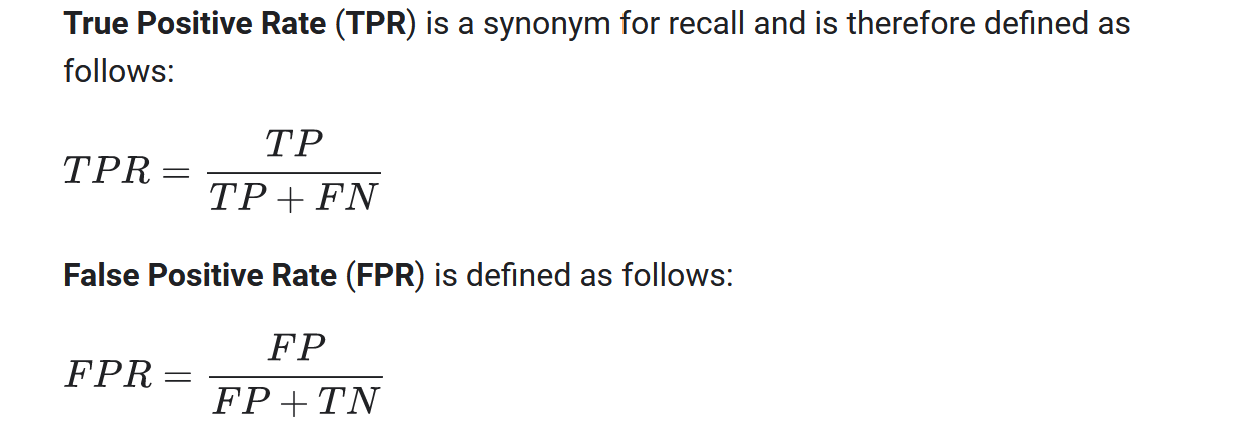


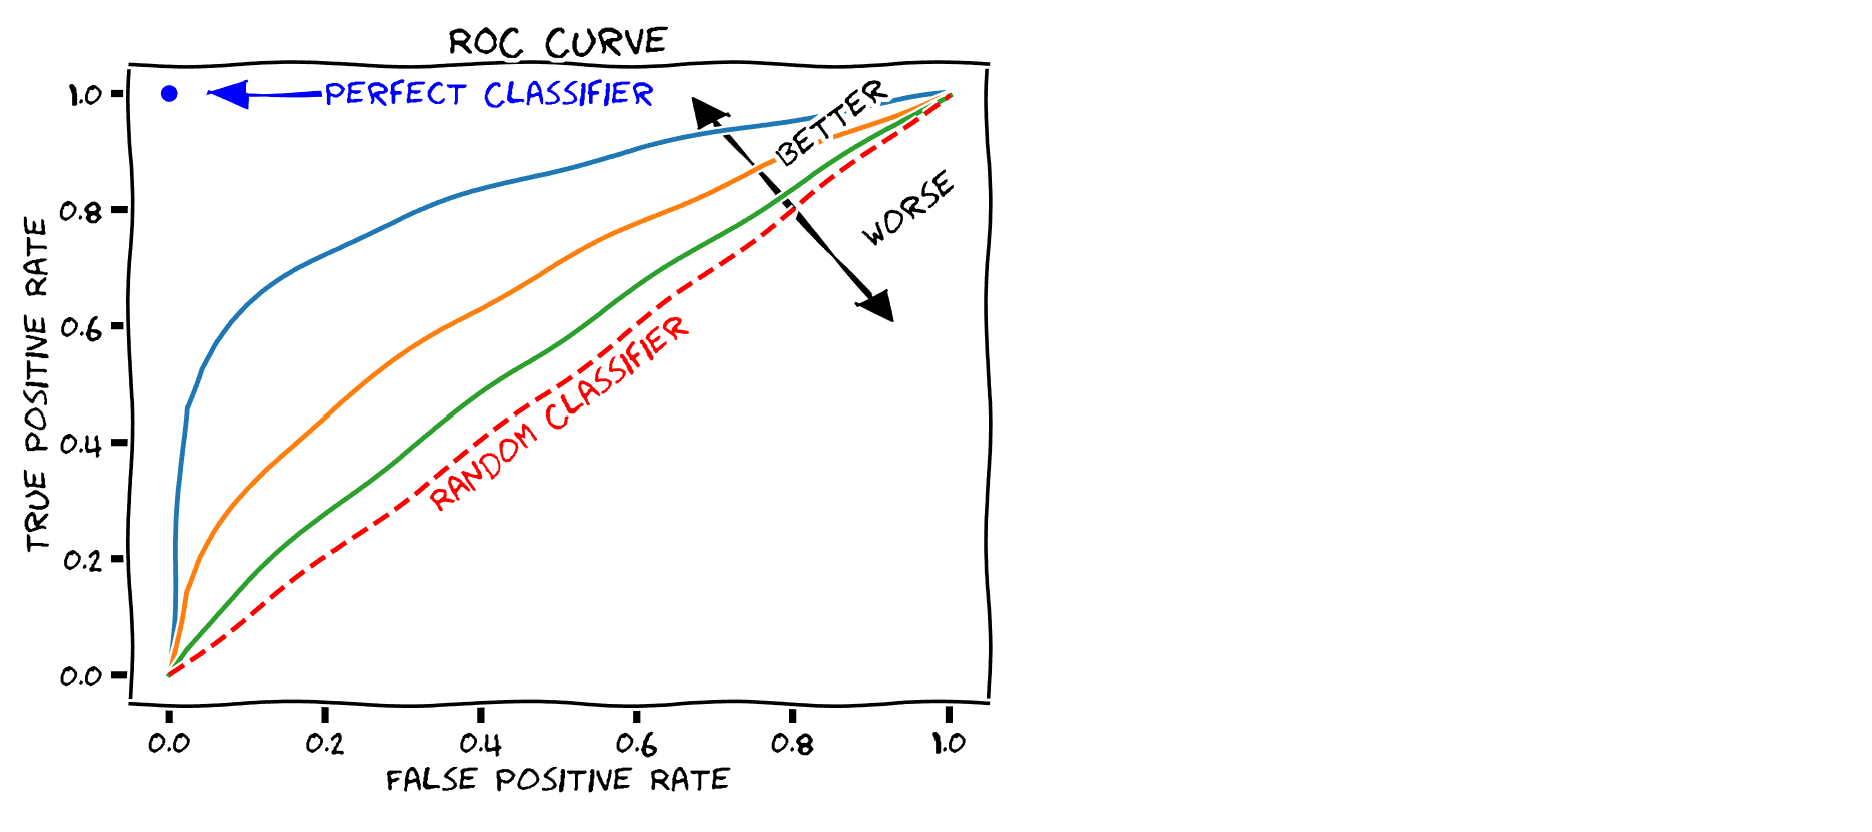

In [363]:
from sklearn.metrics import roc_curve, auc

In [364]:
y_predict_prob = model.predict_proba(X_test[best_features])[:, 1]

In [365]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [374]:
fpr[:40]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00636943, 0.00636943,
       0.01273885, 0.01273885, 0.01910828, 0.01910828, 0.02547771,
       0.02547771, 0.03184713, 0.03184713, 0.03821656, 0.03821656,
       0.05095541, 0.05095541, 0.05095541, 0.06369427, 0.06369427,
       0.07643312, 0.07643312, 0.07643312, 0.08280255, 0.08917197,
       0.08917197, 0.10191083, 0.10191083, 0.10828025, 0.10828025,
       0.11464968, 0.11464968, 0.12738854, 0.12738854, 0.13375796])

In [367]:
tpr[:20]

array([0.        , 0.00900901, 0.03603604, 0.05405405, 0.08108108,
       0.21621622, 0.23423423, 0.35135135, 0.35135135, 0.45945946,
       0.45945946, 0.47747748, 0.47747748, 0.5045045 , 0.5045045 ,
       0.52252252, 0.52252252, 0.53153153, 0.53153153, 0.54954955])

In [368]:
thr[:20]

array([1.94909621, 0.94909621, 0.94089257, 0.94054836, 0.94016994,
       0.89814365, 0.89661249, 0.84510202, 0.83994685, 0.82068811,
       0.81730791, 0.81387844, 0.81285417, 0.79617586, 0.7943194 ,
       0.79232101, 0.78271997, 0.77901756, 0.76755274, 0.76054793])

In [369]:
idx = sum(fpr==0)
tpr[idx]
thr[idx]

0.8399468530800386

In [398]:
idx = sum(fpr<0.1)
tpr[idx], thr[idx], fpr[idx]

(0.7207207207207207, 0.5617352845727053, 0.10191082802547771)

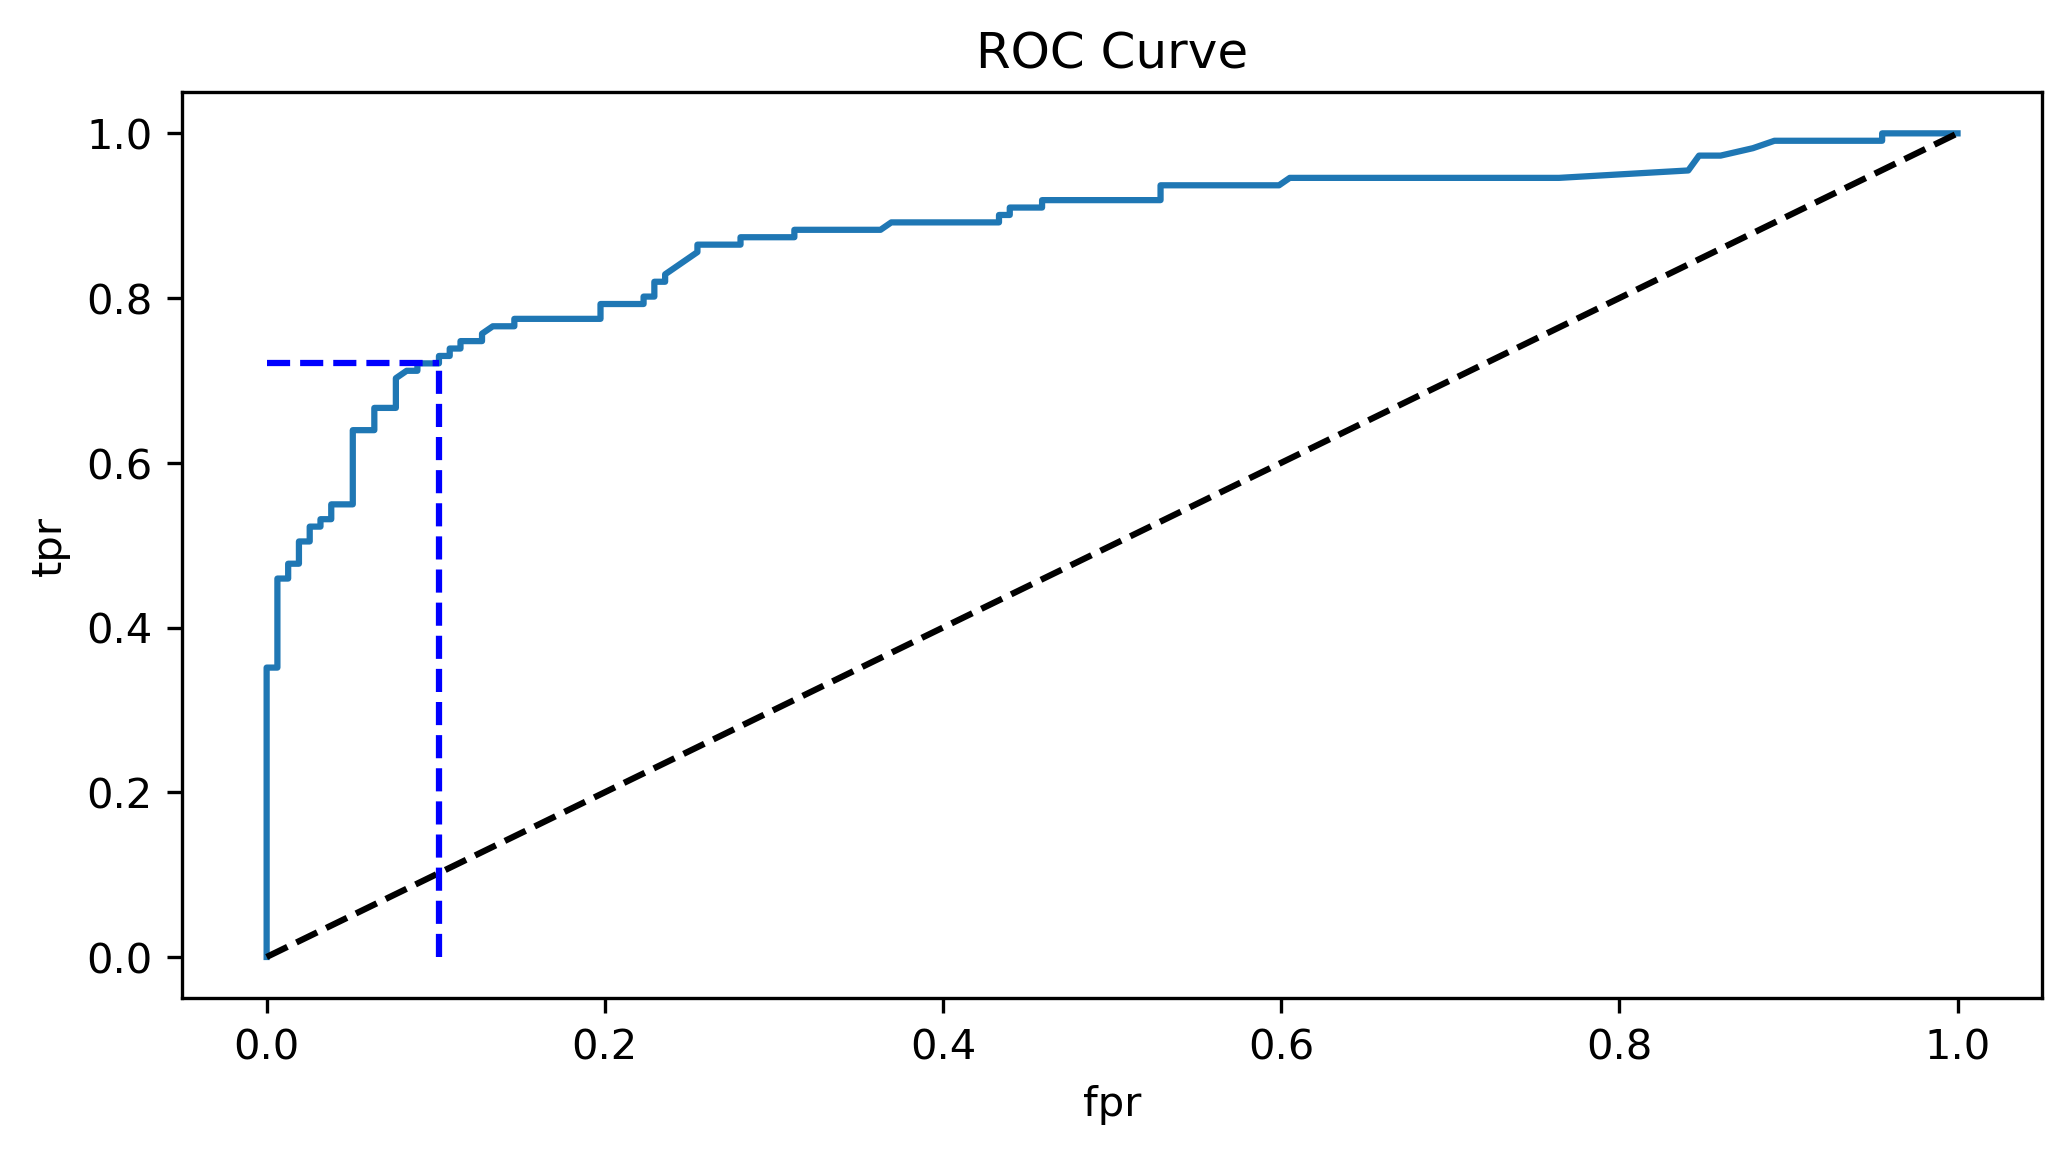

In [399]:
plt.rcParams['figure.dpi'] = 300
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'b--')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'b--')
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()


In [407]:
y_pred = (y_predict_prob>thr[idx]).astype(int)

y_pred = (y_predict_prob>0.9).astype(int)

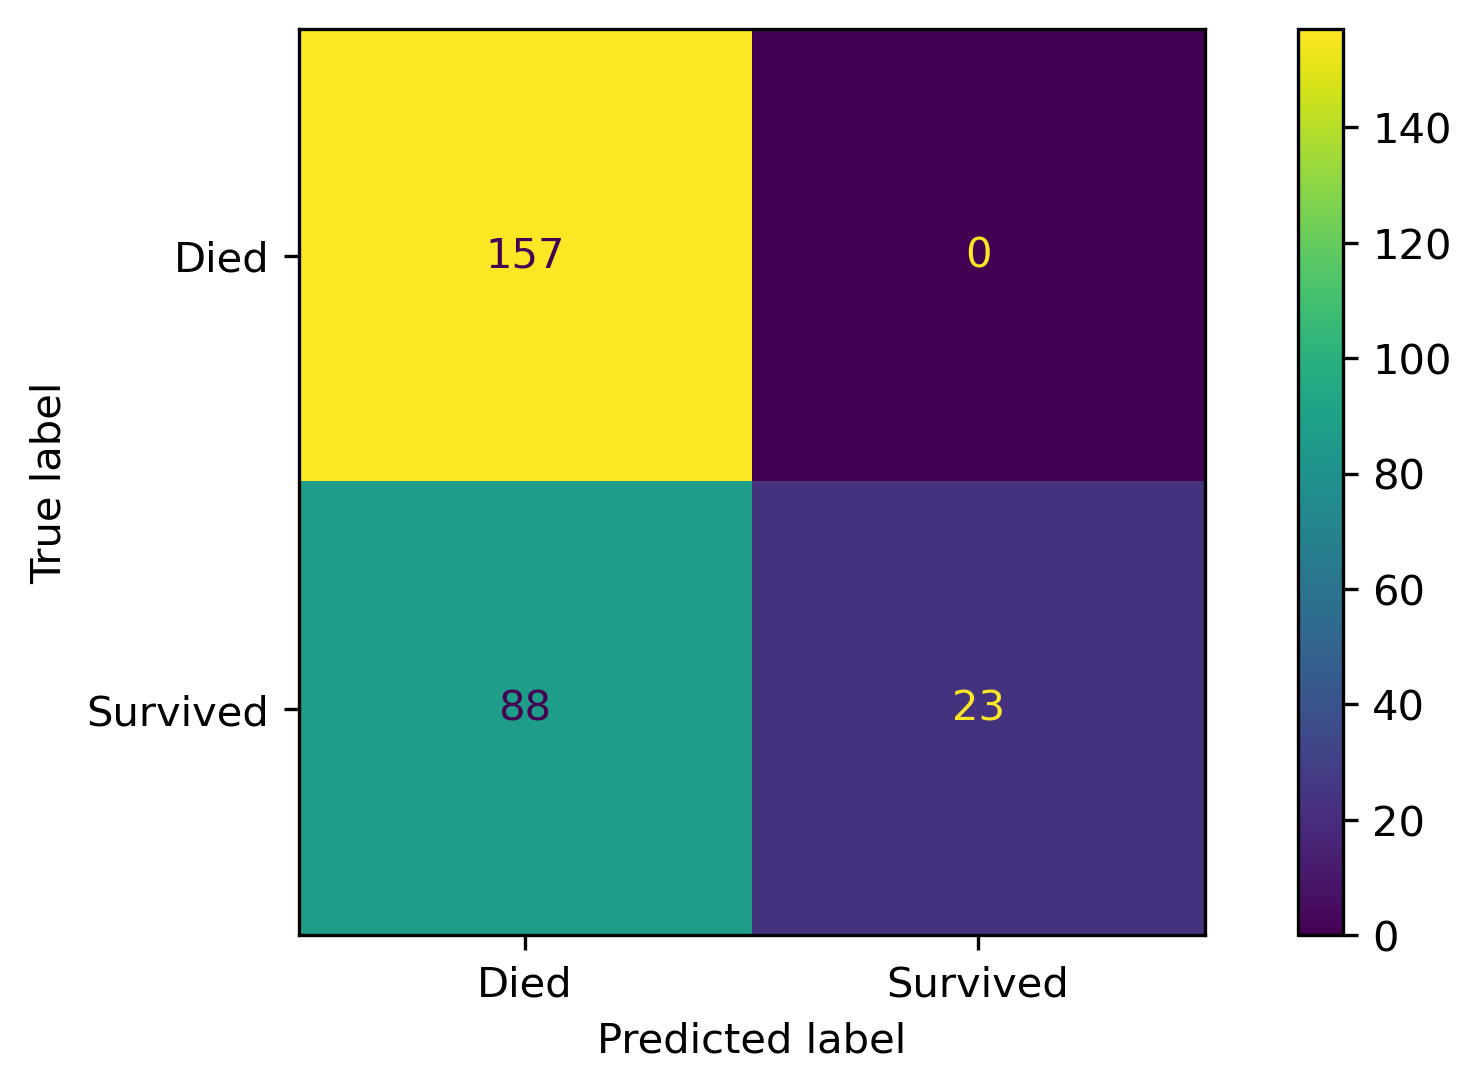

In [408]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Died', 'Survived'])
disp.plot()

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
